In [ ]:
from util import *
from train import *
#dae_latent_dir = train_store_latent(AE_type='DAE', epochs=30, latent_len=32,
# batch_size=64, learning_rate=0.001, random_seed=42, verbose=1)

Prediction accuracy using latent vectors of size 32: 0.99

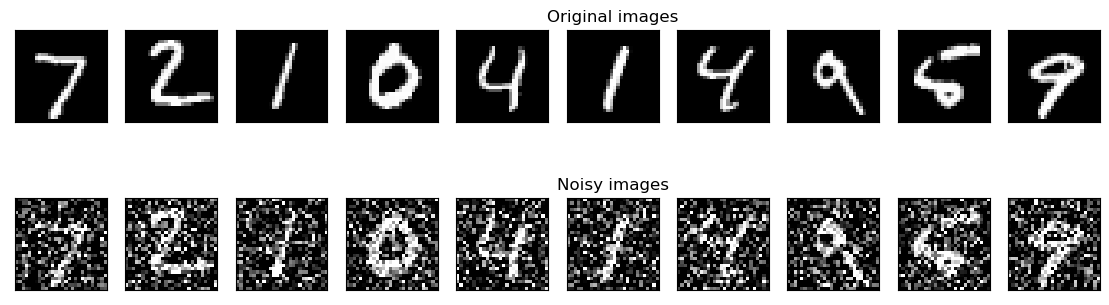

In [1]:
from torchvision import datasets, transforms
import torch
import matplotlib.pyplot as plt
test_data = datasets.MNIST('dataset', train=False, download=True,
                   transform=transforms.ToTensor())
n = 10
plt.figure(figsize=(14, 4))
for i in range(n):
    ax = plt.subplot(2, n, 1 + i)
    img = test_data[i][0].unsqueeze(0)
    noisy_img = img + 0.5 * torch.randn(*img.shape)
    noisy_img = torch.clamp(noisy_img, 0, 1)

    plt.imshow(img.squeeze().numpy(), cmap='gist_gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == n//2:
        ax.set_title('Original images')
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(noisy_img.squeeze().numpy(), cmap='gist_gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == n//2:
        ax.set_title('Noisy images')
plt.show()

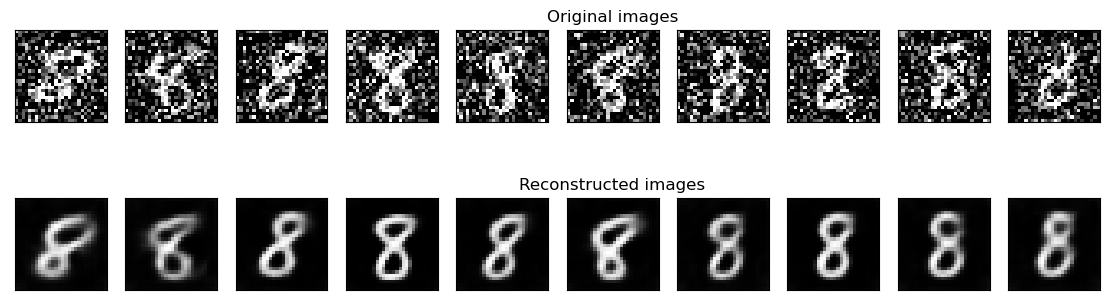

In [3]:
import matplotlib.pyplot as plt
import AECompare.AutoEncoder.denoising_autoencoder as dae
import torch
from util import *
digit = 8
test_data = get_sep_indx_data(digit, False)
model = dae.DenoisingAutoEncoder(
                latent_len=32, digit=digit, random_seed=42)
model.load_state_dict(torch.load(f'AECompare/MNIST_digits_models/DAE_models/{digit}_32_42.pth'))
from util import *
n=10
plt.figure(figsize=(14, 4))
for i in range(n):
    ax = plt.subplot(2, n, 1 + i)
    img = test_data[i][0].unsqueeze(0)#.to(model.device)
    noisy_img = img + 0.5 * torch.randn(*img.shape)
    noisy_img = torch.clamp(noisy_img, 0, 1)
    model.eval()
    with torch.no_grad():
        rec_img, _ = model.forward(noisy_img)
    plt.imshow(noisy_img.squeeze().numpy(), cmap='gist_gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == n//2:
        ax.set_title('Original images')
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(rec_img.squeeze().numpy(), cmap='gist_gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == n//2:
        ax.set_title('Reconstructed images')
plt.show()

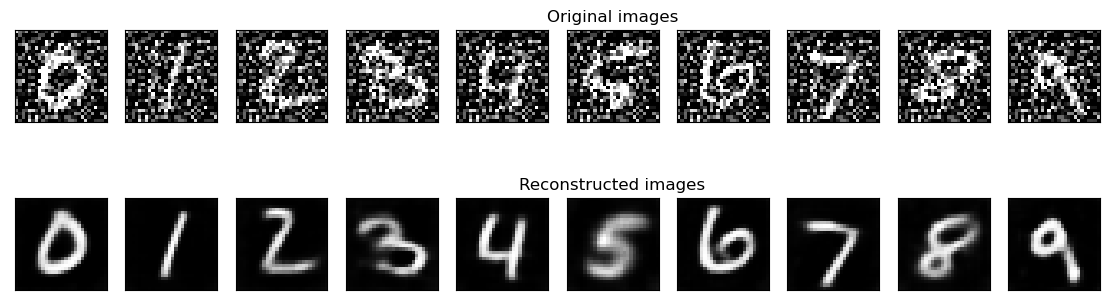

In [5]:
# Generate noisy data, get their latent space, and classify using the latent space
n=10
latent_len = 32
plt.figure(figsize=(14, 4))
for i in range(n):
    ax = plt.subplot(2, n, 1 + i)
    test_data = get_sep_indx_data(i, False)
    model = dae.DenoisingAutoEncoder(latent_len=latent_len, digit=i, random_seed=42)
    model.load_state_dict(torch.load(f'AECompare/MNIST_digits_models/DAE_models/{i}_{latent_len}_42.pth'))
    sample = test_data[0]
    img = sample[0].unsqueeze(0)
    noisy_img = img + 0.5 * torch.randn(*img.shape)
    noisy_img = torch.clamp(noisy_img, 0, 1)
    label = sample[1]
    model.eval()
    with torch.no_grad():
        rec_img, _ = model.forward(noisy_img)
    plt.imshow(noisy_img.squeeze().numpy(), cmap='gist_gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == n//2:
        ax.set_title('Original images')
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(rec_img.squeeze().numpy(), cmap='gist_gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == n//2:
        ax.set_title('Reconstructed images')
plt.show()